# Sınıflandırma

Bir önceki notebook'ta sınıflandırma için Logistic Regression modelini gördük ve k-Nearest Neighbor modeli ile ilgili örnek yaptık. Scikit-learn kütüphanesinde daha birçok sınıflandırma algoritması mevcut. Zaman kısıtından ötürü sadece bir kaçına bakacağız ancak alıştıktan sonra başka algoritmaları kullanmak kolay. Isınma turu olarak *Naive Bayes*, *Decision Tree*, *Multi Layer Perceptron* algoritmalarına hızlıca bakacağız. Daha sonrasında *Support Vector Machine* ve *Random Forest* algoritmalarının kullanımını göreceğiz. Bunu, öznitelik çıkartmak izleyecek.

## Iris Veri Seti Üzerinde Hızlıca

In [1]:
#Ortamı hazırlayalım
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

LogisticRegression:  0.9833333333333333
MultinomialNB:  0.9666666666666667
GaussianNB:  0.95
DecisionTreeClassifier:  0.9
KNeighborsClassifier:  0.9666666666666667
RandomForestClassifier:  0.9166666666666666
LinearSVC:  0.9833333333333333
SVC:  0.9666666666666667
MLPClassifier:  0.9833333333333333


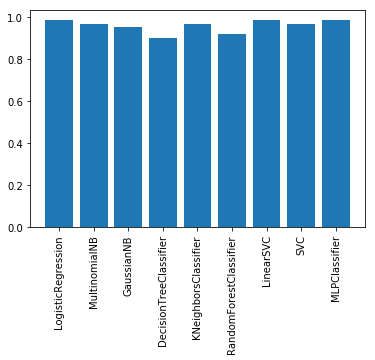

In [22]:
from sklearn import datasets

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import time
seed = int(time.time())


def quickTest(X, y, clf):
    #Her algoritma aynı veri setini görsün diye
    np.random.seed(seed)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, stratify=y)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    print(type(clf).__name__ + ': ', accuracy_score(ypred,ytest))
    return type(clf).__name__, accuracy_score(ypred,ytest)


def plotConfusionMatrix(mat):
    plt.figure(figsize=(12,8))
    plt.imshow(mat)

    # Loop over data dimensions and create text annotations.
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            text = plt.text(j, i, mat[i, j], ha="center", va="center", color="white")
        
    plt.xlabel('gerçek sınıf')
    plt.ylabel('tahminlenen sınıf');

iris_data = datasets.load_iris()
X = iris_data['data']
y = iris_data['target']

names = ['']*9
accuracies = [0]*9

names[0], accuracies[0] = quickTest(X,y,LogisticRegression(multi_class = 'auto',
                                                           solver ='lbfgs', 
                                                           max_iter = 1000))
names[1], accuracies[1] = quickTest(X,y,MultinomialNB())
names[2], accuracies[2] = quickTest(X,y,GaussianNB())
names[3], accuracies[3] = quickTest(X,y,DecisionTreeClassifier())
names[4], accuracies[4] = quickTest(X,y,KNeighborsClassifier())
names[5], accuracies[5] = quickTest(X,y,RandomForestClassifier(n_estimators = 5))
names[6], accuracies[6] = quickTest(X,y,LinearSVC(max_iter=10000))
names[7], accuracies[7] = quickTest(X,y,SVC(gamma='auto'))
names[8], accuracies[8] = quickTest(X,y,MLPClassifier(hidden_layer_sizes=(20, ),
                                                      max_iter=10000))

plt.bar(list(range(9)),accuracies)
plt.xticks(list(range(9)),names,rotation='vertical')
plt.show()

Sentetik 2 boyutlu veride sınıflandırma algoritmalarının karşılaştırması: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

## El Yazısı Rakam Veri Seti

Biraz daha entersan bir probleme bakalım

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

8x8 çözünürlükte 1797 adet resim var. Daha yüksek çözünürlüklü ve daha kalabalık bir el yazısı rakam veri seti için "MNIST data set" kelimeleri ile arama yapabilirsiniz. Hazır scikit-learn ile geldiği için ufak versiyonunu kullanacağız.

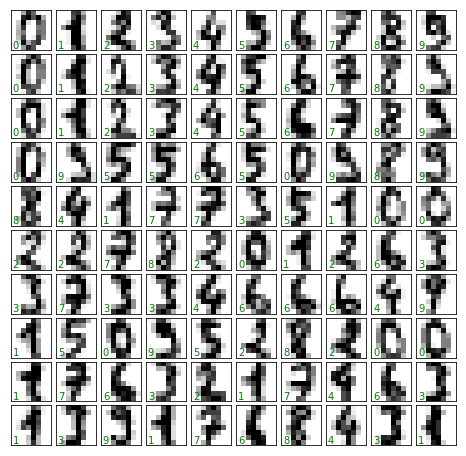

In [4]:
#0dan 9a toplam 10 adet rakam var. Örnek bir kısmını çizdirelim
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Girdilerimiz 3 boyutlu ancak scikit-learn 2 boyutlu istiyor. Çözüm olarak piksel değerlerini 8x8 bir matristen, 64lük bir vektöre çevireceğiz. Scikit-learn bizim için çoktan yapmış.

In [5]:
X = digits['data']
y = digits['target']

print(X.shape, y.shape)

(1797, 64) (1797,)


Hem doğrusal, hem de çekirdek SVM öğrenelim. Her iki tür SVM'in `C` ile belirttiğimiz regülarizasyon parametresi var. Çekirdek SVM'in birden fazla hiperparametresi var. Örneğin çekirdek türü ve bu türe göre gelen ek parametreler

In [6]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, 
                                                stratify=y)
cv=StratifiedKFold(n_splits=5, shuffle=True)

#Convergence uyarıları verdiği için kapattım
#linSvmParams = {'C': [0.001, 0.01, 0.1, 1, 10]}
#lsvc = GridSearchCV(LinearSVC(max_iter=20000), linSvmParams, cv=cv, iid=True)
#lsvc.fit(Xtrain,ytrain)
#ypred = lsvc.predict(Xtest)
#print('Linear SVM: ', accuracy_score(ypred,ytest))

ksvmParams = {'C': [0.001, 0.01, 0.1, 1, 10],
             'kernel': ['poly', 'rbf'],
             'degree': [1,2,3,4,5]}

ksvc = RandomizedSearchCV(SVC(gamma='scale'), ksvmParams, cv=cv, n_iter=20, iid=True)
ksvc.fit(Xtrain,ytrain)
ypred = ksvc.predict(Xtest)
print('Seçilen Çekirdek: ', ksvc.best_estimator_.kernel)
print('Seçilen C: ', ksvc.best_estimator_.C)
print('Kernel SVM: ', accuracy_score(ypred,ytest))

Seçilen Çekirdek:  rbf
Seçilen C:  10
Kernel SVM:  0.9902642559109874


Verinin bir alt kümesine bakalım

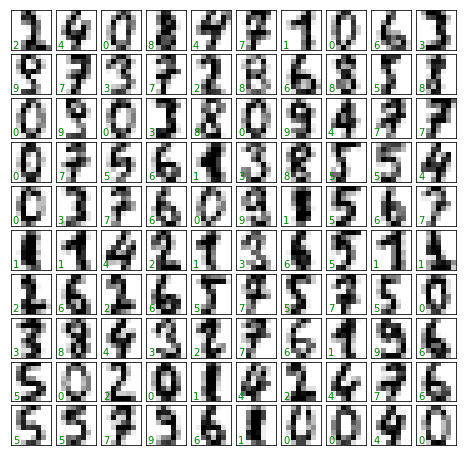

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')

Hata Matrisine bakalım:

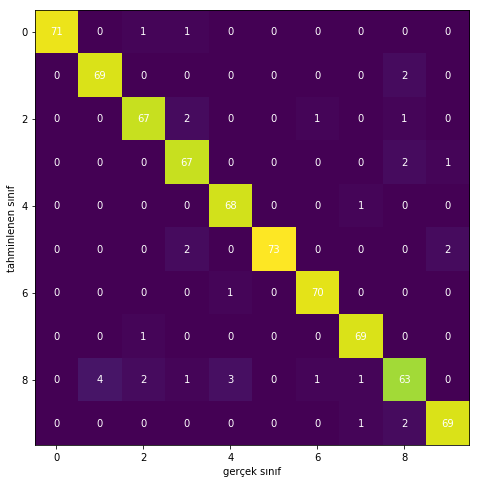

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred,ytest)
plotConfusionMatrix(mat)

Kıyaslamak adına MLP, GaussianNB ve Decision Tree deneyelim:

Seçilen Saklı Katman:  (30,)
MLP:  0.9541029207232267


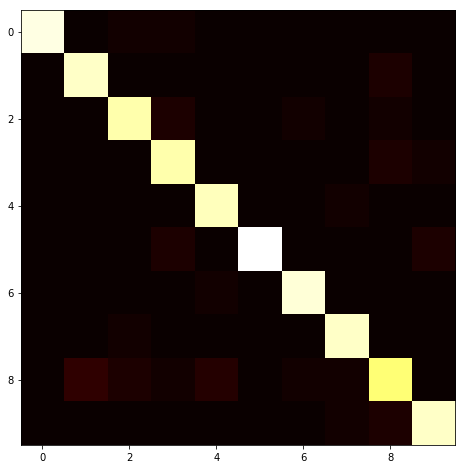

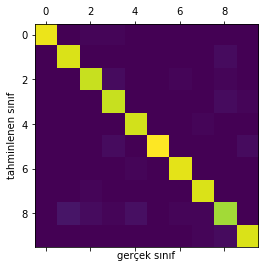

In [10]:
paramsToTestMLP = {'hidden_layer_sizes': [(30, ), (10, ), (5,), (20,10)]}
mlp =  GridSearchCV(MLPClassifier(max_iter=10000), paramsToTestMLP, cv=cv, iid=True)
mlp.fit(Xtrain,ytrain)
ypred = mlp.predict(Xtest)
print('Seçilen Saklı Katman: ', mlp.best_estimator_.hidden_layer_sizes)
print('MLP: ', accuracy_score(ypred,ytest))
mat = confusion_matrix(ypred,ytest)
plotConfusionMatrix(mat)

GaussianMB:  0.8317107093184979


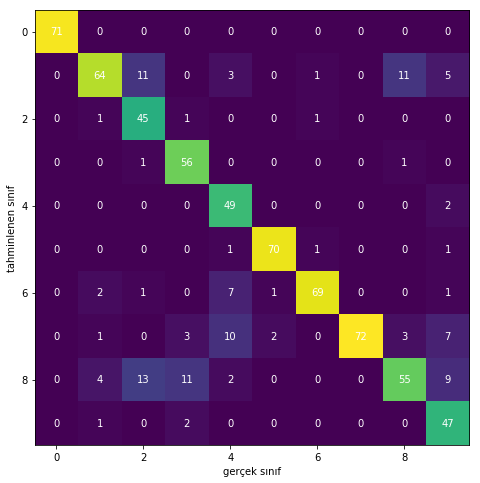

In [24]:
gmb = GaussianNB()
gmb.fit(Xtrain, ytrain)
ypred = gmb.predict(Xtest)
print('GaussianMB: ', accuracy_score(ypred,ytest))
mat = confusion_matrix(ypred,ytest)
plotConfusionMatrix(mat)

Seçilenler:  None 7 2 gini
Decision Tree:  0.8205841446453408


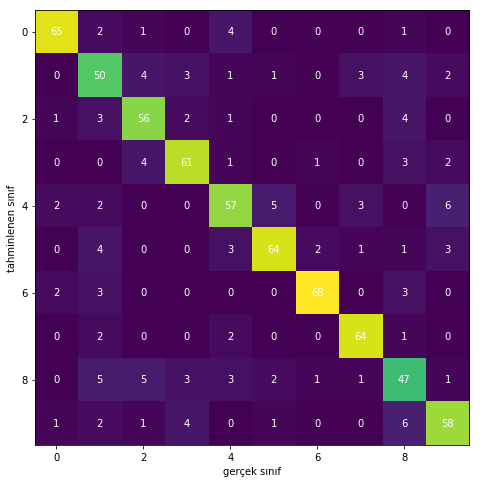

In [25]:
from scipy.stats import randint as sp_randint

dtParams = {"max_depth": [5, None],
            "max_features": sp_randint(1, 11),
            "min_samples_split": sp_randint(2, 11),
            "criterion": ["gini", "entropy"]}

dt = RandomizedSearchCV(DecisionTreeClassifier(), dtParams, cv=cv, n_iter=25, iid=True)
dt.fit(Xtrain,ytrain)
ypred = dt.predict(Xtest)
print('Seçilenler: ', dt.best_estimator_.max_depth,dt.best_estimator_.max_features,
      dt.best_estimator_.min_samples_split,dt.best_estimator_.criterion)
print('Decision Tree: ', accuracy_score(ypred,ytest))
mat = confusion_matrix(ypred,ytest)
plotConfusionMatrix(mat)

Decision tree çok iyi sonuç vermedi. Bir de RandomForest algoritmasına bakalım

Seçilenler:  None 7 4 False entropy
Random Forest:  0.9513212795549374


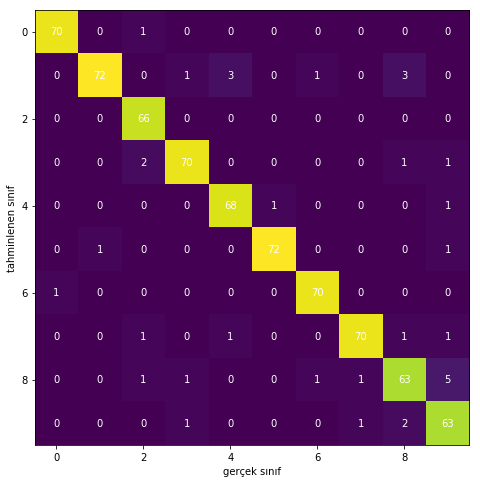

In [26]:
from scipy.stats import randint as sp_randint

rfParams = {"max_depth": [5, None],
            "max_features": sp_randint(1, 11),
            "min_samples_split": sp_randint(2, 11),
            "bootstrap": [True, False],
            "criterion": ["gini", "entropy"]}

rf = RandomizedSearchCV(RandomForestClassifier(n_estimators=10), rfParams, cv=cv, n_iter=25, iid=True)
rf.fit(Xtrain,ytrain)
ypred = rf.predict(Xtest)
print('Seçilenler: ', rf.best_estimator_.max_depth,rf.best_estimator_.max_features,
      rf.best_estimator_.min_samples_split,rf.best_estimator_.bootstrap,rf.best_estimator_.criterion)
print('Random Forest: ', accuracy_score(ypred,ytest))
mat = confusion_matrix(ypred,ytest)
plotConfusionMatrix(mat)